In [1]:
import numpy as np
import sklearn
import kmapper as km
import pygeodesic
import pygeodesic.geodesic as geodesic
from scipy.spatial import distance_matrix
import vtk
from mpl_toolkits.mplot3d import Axes3D  # noqa
import scipy as sp
import numpy as np
import networkx as nx
import random
import math
from networkx.algorithms import approximation
from scipy.spatial.distance import cdist
import open3d as o3d
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

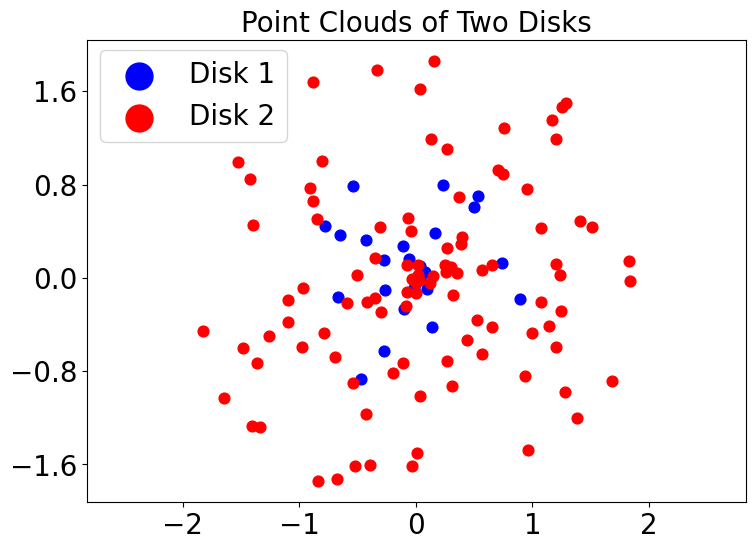

625
10000
1.861844131246017
3.8788118426059315


In [2]:
random_state=1
np.random.seed(random_state)
random.seed(random_state)

def generate_point_cloud(radius, num_points):
    """
    Generate a point cloud within a disc of a given radius.

    :param radius: Radius of the disc.
    :param num_points: Number of points to generate.
    :return: Array of points in the disc.
    """
    # Generate random angles and radii
    angles = np.random.uniform(0, 2 * np.pi, num_points)
    radii = np.random.uniform(0, radius, num_points)

    # Convert polar coordinates to Cartesian coordinates
    x = radii * np.cos(angles)
    y = radii * np.sin(angles)

    return x, y

# Number of points in the larger disc
N = 100

# Generate point clouds for both discs
x_small, y_small = generate_point_cloud(1, N // 4)
x_large, y_large = generate_point_cloud(2, N)

# Plotting
plt.figure(figsize=(8.5, 6))
plt.scatter(x_small, y_small, color='blue', s=60, label='Disk 1')
plt.scatter(x_large, y_large, color='red', s=60, label='Disk 2')
plt.axis('equal')
plt.legend(loc=[0.02,0.78], markerscale=2.5, fontsize=20)
plt.title('Point Clouds of Two Disks', fontsize=20)
plt.gca().yaxis.set_major_locator(MaxNLocator(nbins=5)) 
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('DiskDisk_0109.png')
plt.show()


C1 = cdist(np.column_stack((x_small, y_small)), np.column_stack((x_small, y_small)))
C2 = cdist(np.column_stack((x_large, y_large)), np.column_stack((x_large, y_large)))


print(np.size(C1))
print(np.size(C2))

print(np.max(C1))
print(np.max(C2))
 


In [3]:
random_state=1
np.random.seed(random_state)
random.seed(random_state)

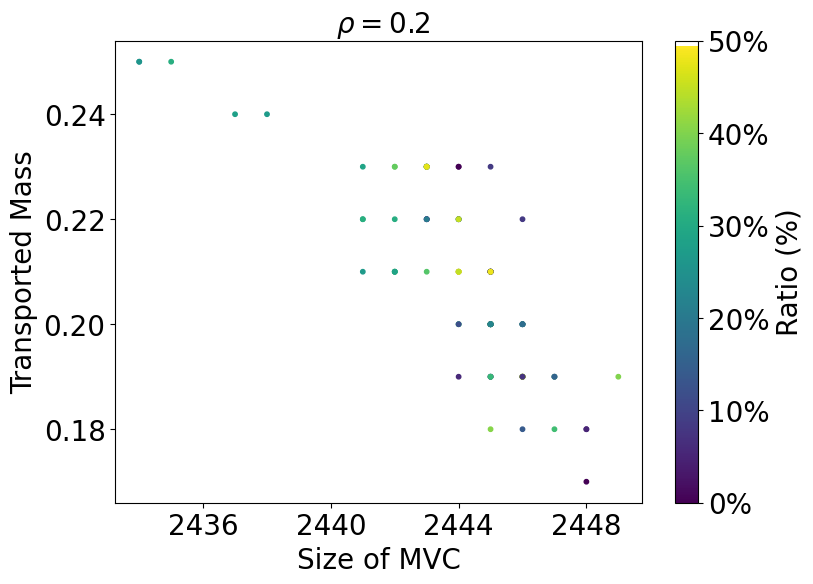

In [4]:
A_sum_list_rho = np.load("DiskDisk_A_sum_rho_0.2_0107.npy")
P_sum_list_rho = np.load("DiskDisk_P_sum_rho_0.2_0107.npy")
Ratio_list_rho = np.load("DiskDisk_Ratio_rho_0.2_0107.npy")

plt.figure(figsize=(8.5, 6))
scatter = plt.scatter(A_sum_list_rho, P_sum_list_rho, s=10, c=Ratio_list_rho)
cbar = plt.colorbar(scatter)
cbar.set_label('Ratio (%)', fontsize=20)
cbar.set_ticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
cbar.set_ticklabels(['0%', '10%', '20%', '30%', '40%', '50%'])
cbar.ax.tick_params(labelsize=20)

plt.xlabel('Size of MVC', fontsize=20)  
plt.ylabel('Transported Mass', fontsize=20) 
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5)) 
plt.title(r' $\rho=0.2$', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.savefig('DiskDisk_ratio_0109.png')


In [5]:
n_exp = 200
rhos = np.random.uniform(0, 3.7, n_exp)
ratios = np.random.uniform(0.0001, 0.5000, n_exp)

In [6]:
rhos

array([1.54298142e+00, 2.66520063e+00, 4.23186824e-04, 1.11863052e+00,
       5.42996796e-01, 3.41652801e-01, 6.89162782e-01, 1.27857469e+00,
       1.46803965e+00, 1.99362192e+00, 1.55101970e+00, 2.53531215e+00,
       7.56473324e-01, 3.24903451e+00, 1.01334095e-01, 2.48072979e+00,
       1.54402777e+00, 2.06715237e+00, 5.19431673e-01, 7.32975510e-01,
       2.96275490e+00, 3.58256783e+00, 1.15966946e+00, 2.56159368e+00,
       3.24263986e+00, 3.31004465e+00, 3.14663582e-01, 1.44502698e-01,
       6.28372552e-01, 3.24912726e+00, 3.63883285e-01, 1.55809821e+00,
       3.54419126e+00, 1.97271155e+00, 2.55994532e+00, 1.16740783e+00,
       2.54005343e+00, 3.08811499e+00, 6.76666262e-02, 2.77553397e+00,
       3.65878603e+00, 2.76821292e+00, 1.03764277e+00, 2.92033352e+00,
       3.81936224e-01, 1.65720605e+00, 3.36180336e+00, 1.08637235e+00,
       1.06476875e+00, 4.81105717e-01, 7.16577441e-02, 2.51169147e+00,
       7.83024029e-01, 9.82522640e-01, 1.81882069e+00, 1.97441417e-01,
      

In [7]:
A_sum_list = np.load("DiskDisk_A_sum_0107.npy")
P_sum_list = np.load("DiskDisk_P_sum_0107.npy")

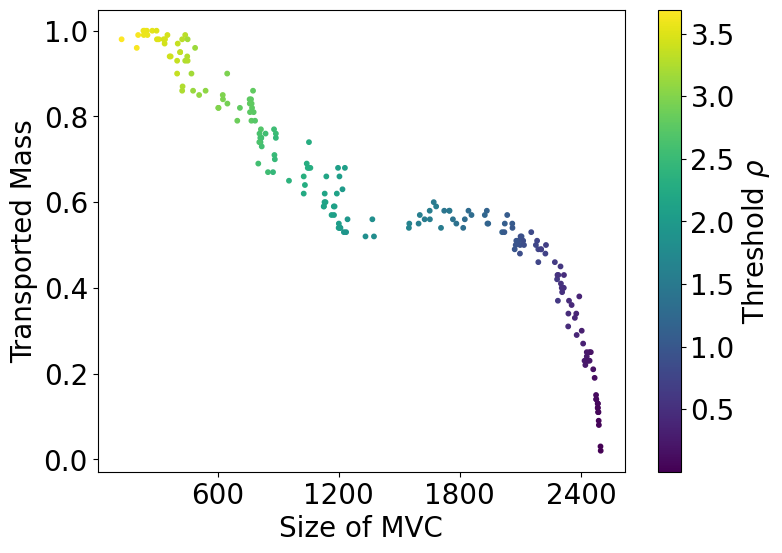

In [8]:
plt.figure(figsize=(8.5, 6))
scatter = plt.scatter(A_sum_list, P_sum_list, s=10, c=rhos)
cbar = plt.colorbar(scatter)
cbar.set_label(r'Threshold $\rho$',fontsize=20)
cbar.ax.tick_params(labelsize=20)

plt.xlabel('Size of MVC', fontsize=20)
plt.ylabel('Transported Mass', fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=20)
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=5)) 
#plt.title(r' $\sum P_{ij}$ vs MVC size')
plt.savefig('DiskDisk_rho_0109.png')